In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay, roc_auc_score,auc,roc_curve

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.ensemble import StackingClassifier
from sklearn.calibration import CalibratedClassifierCV
from imblearn.over_sampling import ADASYN

In [2]:
#load the data
realDF = pd.read_csv("Data/healthcare-dataset-stroke-data.csv")
synDF = pd.read_csv("Data/train.csv")
testDF = pd.read_csv("Data/test.csv")
training = pd.concat([realDF, synDF], ignore_index = True)


In [3]:
testDF.head(20)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,15304,Female,57.0,0,0,Yes,Private,Rural,82.54,33.4,Unknown
1,15305,Male,70.0,1,0,Yes,Private,Urban,72.06,28.5,Unknown
2,15306,Female,5.0,0,0,No,children,Urban,103.72,19.5,Unknown
3,15307,Female,56.0,0,0,Yes,Govt_job,Urban,69.24,41.4,smokes
4,15308,Male,32.0,0,0,Yes,Private,Rural,111.15,30.1,smokes
5,15309,Female,48.0,0,0,Yes,Private,Urban,59.20,32.5,never smoked
6,15310,Female,39.0,0,0,Yes,Private,Rural,96.26,24.9,Unknown
7,15311,Female,52.0,0,1,Yes,Govt_job,Rural,103.12,31.6,formerly smoked
8,15312,Female,12.0,0,0,No,children,Rural,81.59,27.3,Unknown
9,15313,Female,54.0,0,0,Yes,Private,Rural,79.26,25.0,never smoked


In [4]:
training.head(20)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [5]:
training.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,20414.000000,20414.000000,20414.000000,20414.000000,20414.000000,20213.000000,20414.000000
mean,14877.273636,41.870510,0.061673,0.031008,93.322256,28.302280,0.043157
std,16825.306948,21.756482,0.240567,0.173344,32.476351,7.021765,0.203215
min,0.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,4766.250000,25.000000,0.000000,0.000000,75.220000,23.500000,0.000000
50%,9511.500000,43.000000,0.000000,0.000000,86.250000,27.700000,0.000000
75%,14279.750000,58.000000,0.000000,0.000000,99.730000,32.200000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
testDF.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi
count,10204.000000,10204.000000,10204.000000,10204.000000,10204.000000,10204.000000
mean,20405.500000,41.920713,0.051450,0.021756,89.197766,28.242351
std,2945.785407,21.097956,0.220925,0.145894,25.914364,6.733863
min,15304.000000,0.080000,0.000000,0.000000,55.120000,11.500000
25%,17854.750000,26.000000,0.000000,0.000000,75.060000,23.700000
50%,20405.500000,43.500000,0.000000,0.000000,85.070000,27.700000
75%,22956.250000,57.000000,0.000000,0.000000,96.750000,32.000000
max,25507.000000,82.000000,1.000000,1.000000,267.600000,97.600000


In [7]:

# Sample size - 10% of each DF 
sample_size_1 = int(0.1 * len(realDF))
sample_size_2 = int(0.1 * len(synDF))
sample_size_3 = int(0.1 * len(testDF))

# Randomly sample the dataframes
sample_realDF = realDF.sample(sample_size_1, random_state=42)
sample_synDF = synDF.sample(sample_size_2, random_state=42)
sample_testDF = testDF.sample(sample_size_3, random_state=42)



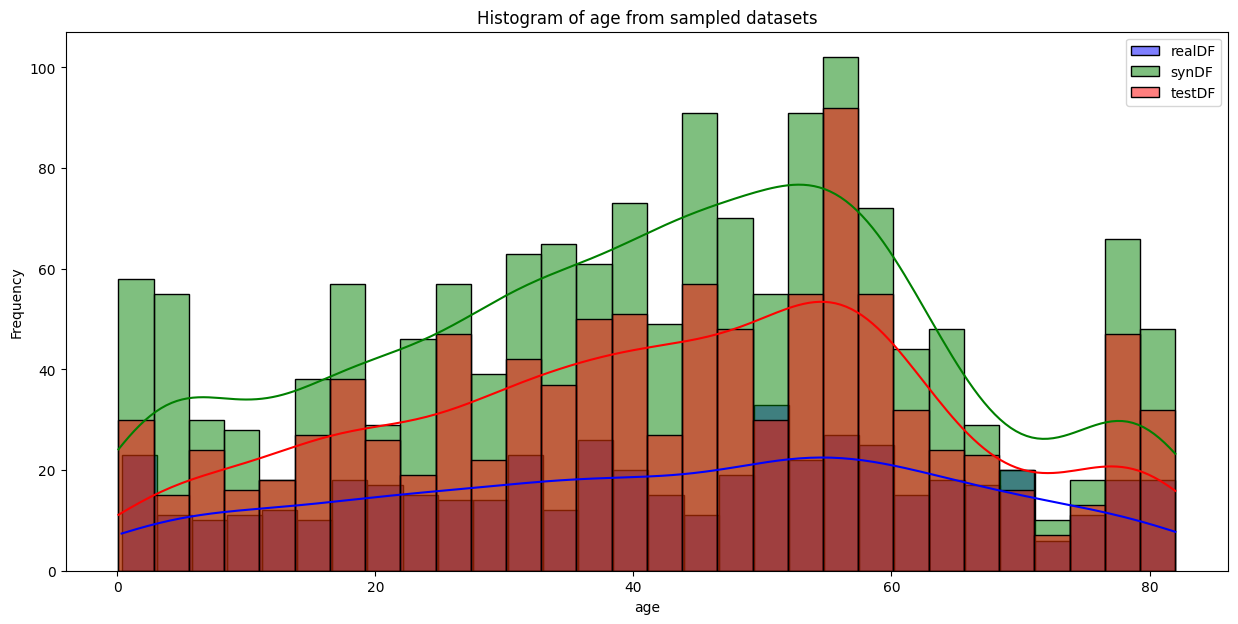

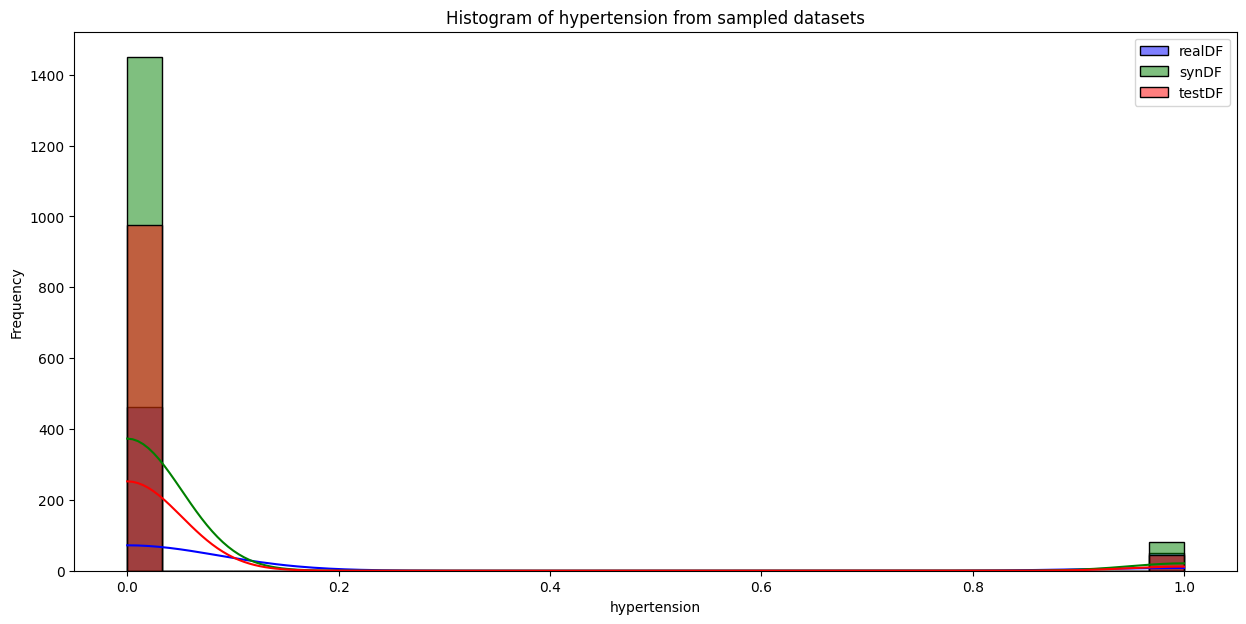

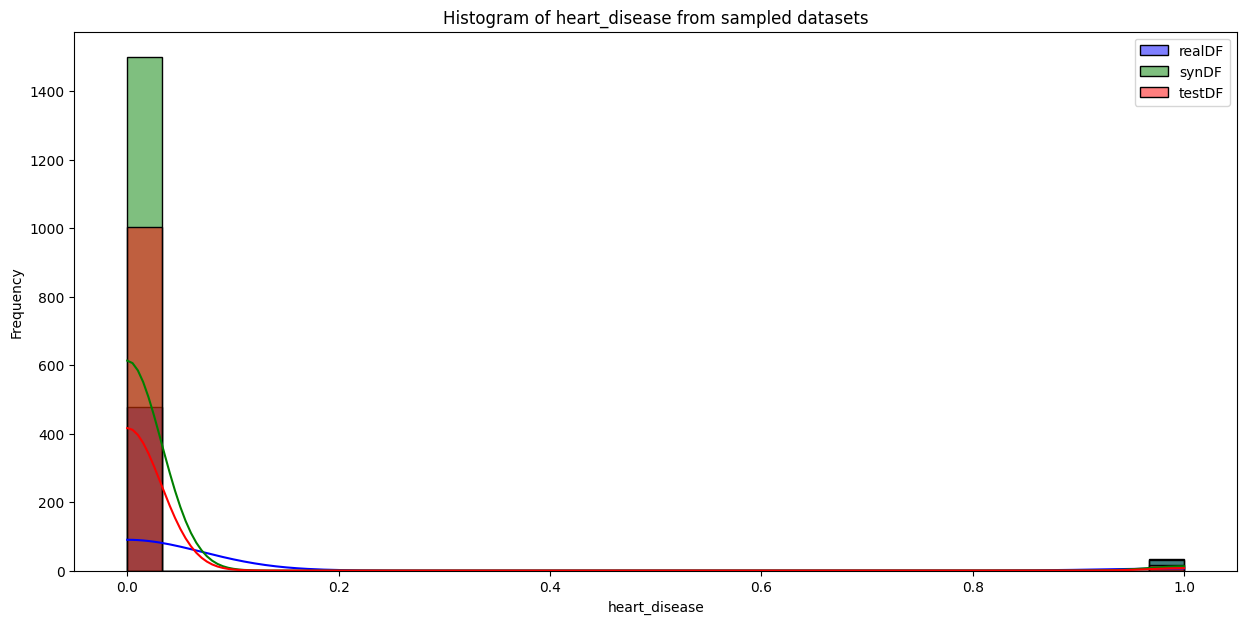

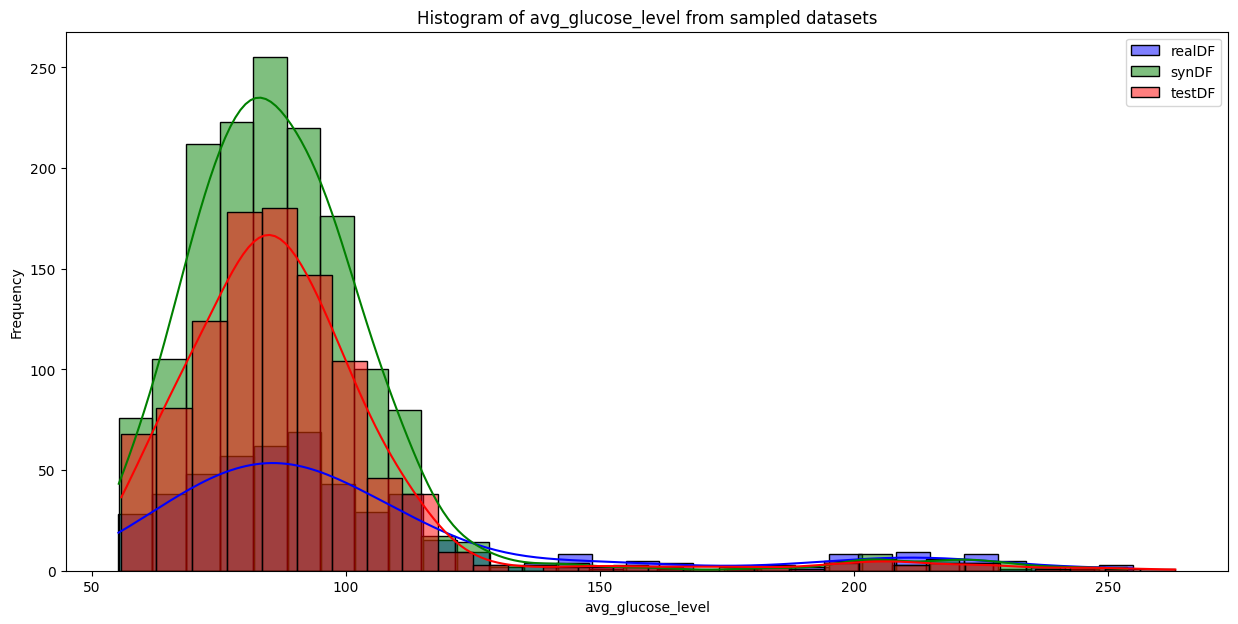

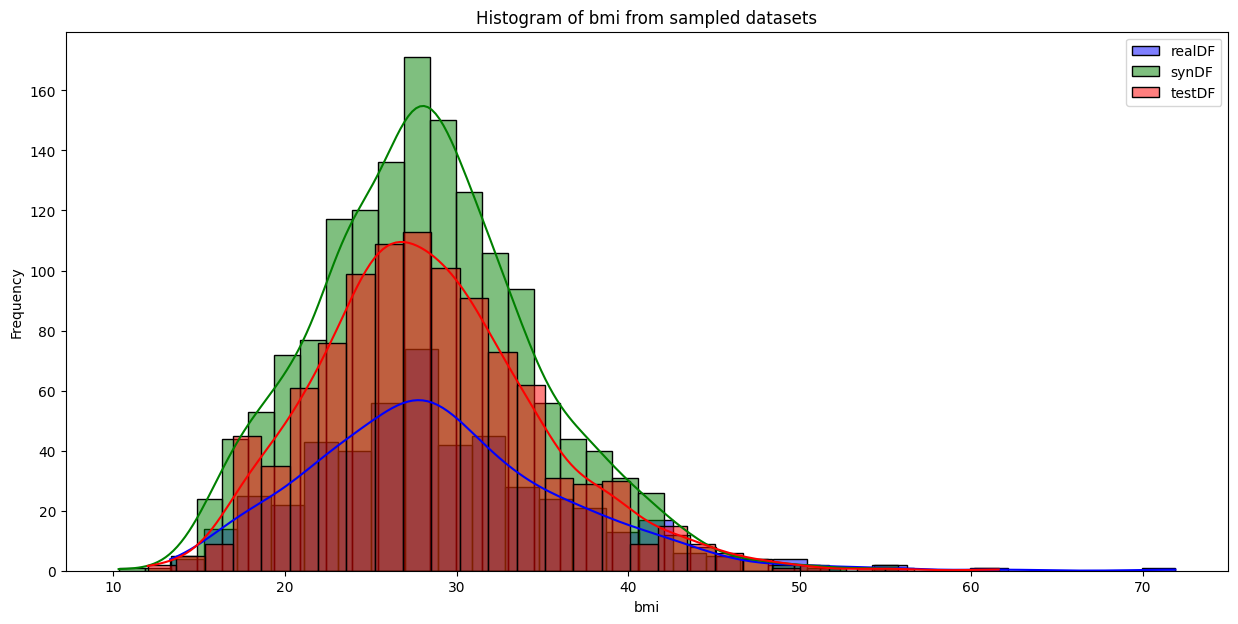

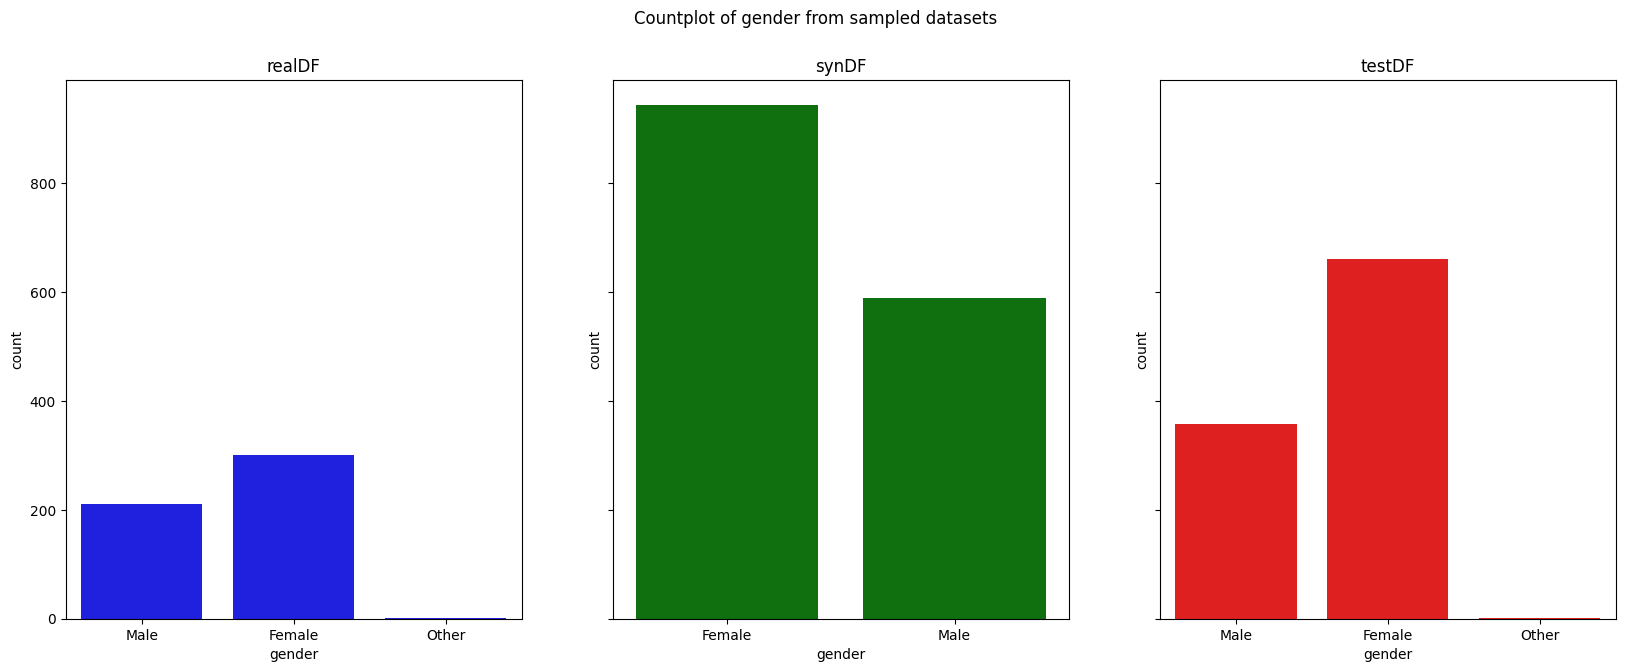

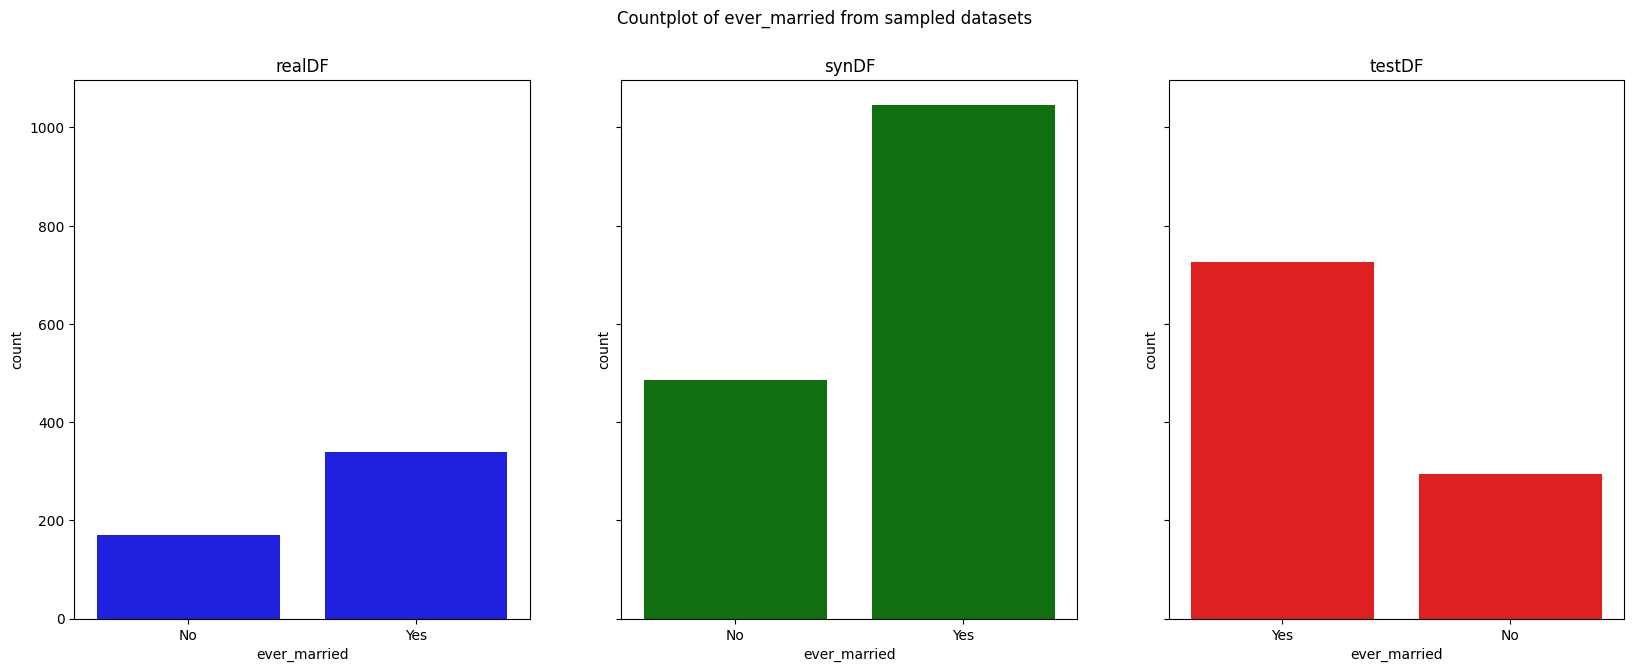

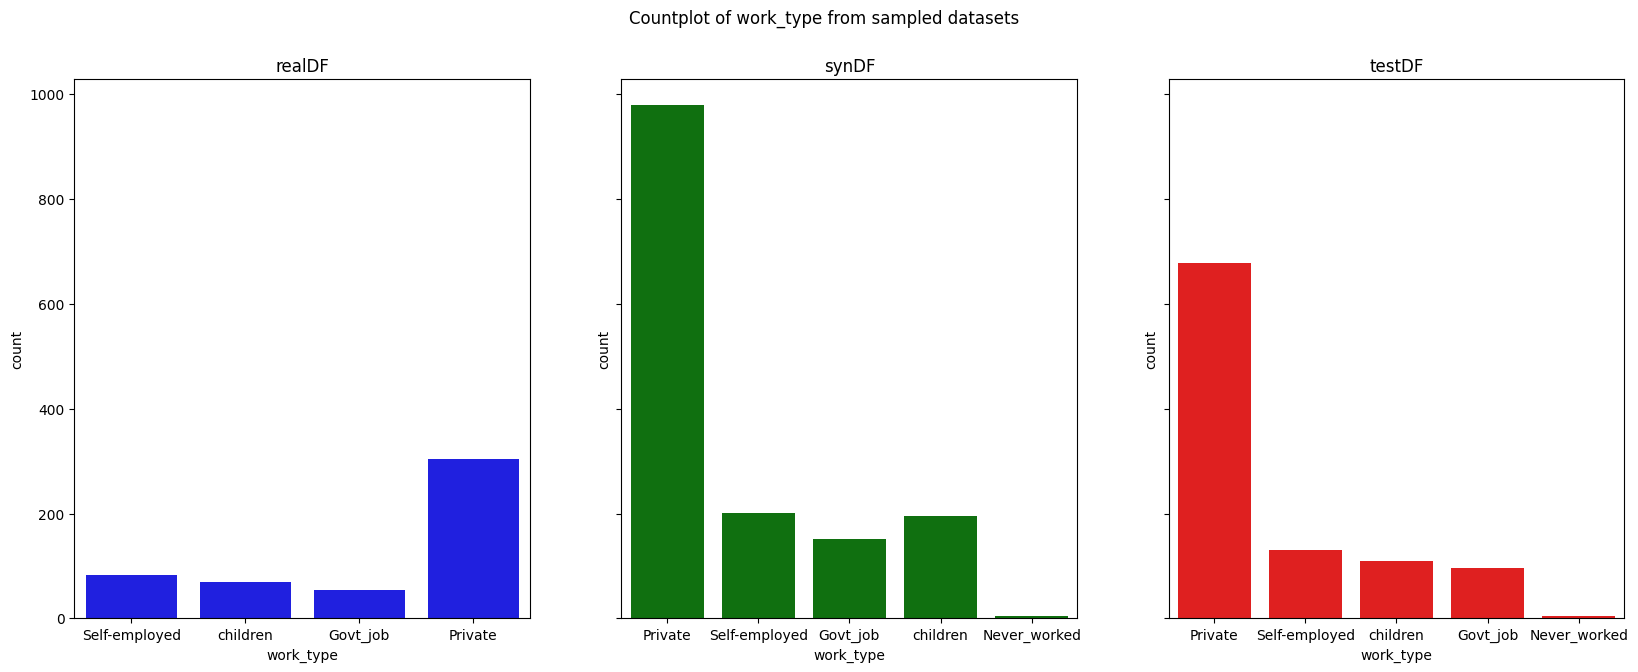

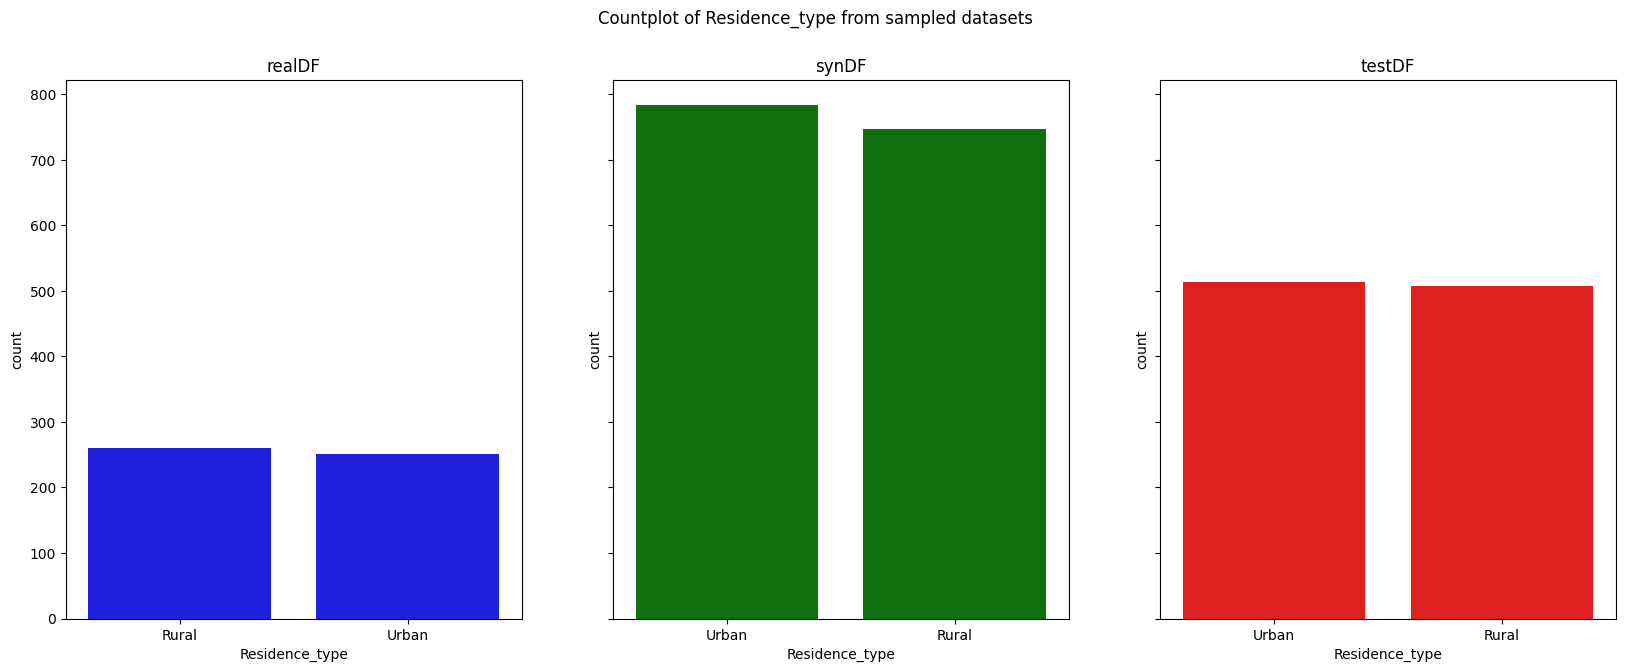

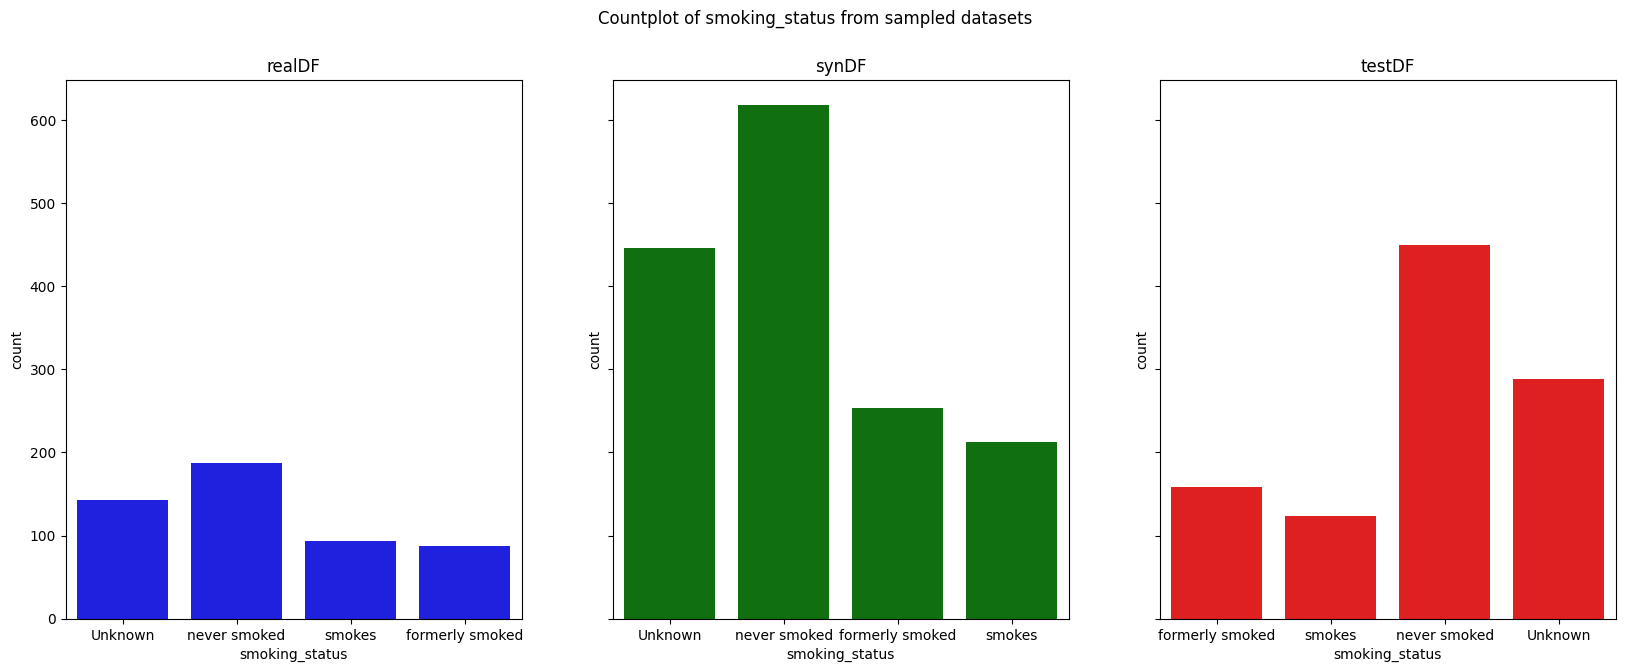

In [8]:
#create histograms for each numerical feature and countplots for each categorical feature
# List of numerical features
num_features = ['age','hypertension', 'heart_disease','avg_glucose_level','bmi']

# List of categorical features
cat_features = ['gender','ever_married','work_type','Residence_type','smoking_status']

# Visualize numerical features
for feature in num_features:
    plt.figure(figsize=(15,7))

    sns.histplot(sample_realDF[feature], bins=30, color='blue', label='realDF', kde=True)
    sns.histplot(sample_synDF[feature], bins=30, color='green', label='synDF', kde=True)
    sns.histplot(sample_testDF[feature], bins=30, color='red', label='testDF', kde=True)

    plt.title('Histogram of ' + feature + ' from sampled datasets')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

# Visualize categorical features
for feature in cat_features:
    fig, axes = plt.subplots(1, 3, figsize=(20, 7), sharey=True)

    sns.countplot(ax=axes[0], x=sample_realDF[feature], color='blue')
    axes[0].set_title('realDF')
    sns.countplot(ax=axes[1], x=sample_synDF[feature], color='green')
    axes[1].set_title('synDF')
    sns.countplot(ax=axes[2], x=sample_testDF[feature], color='red')
    axes[2].set_title('testDF')

    fig.suptitle('Countplot of ' + feature + ' from sampled datasets')
    plt.show()


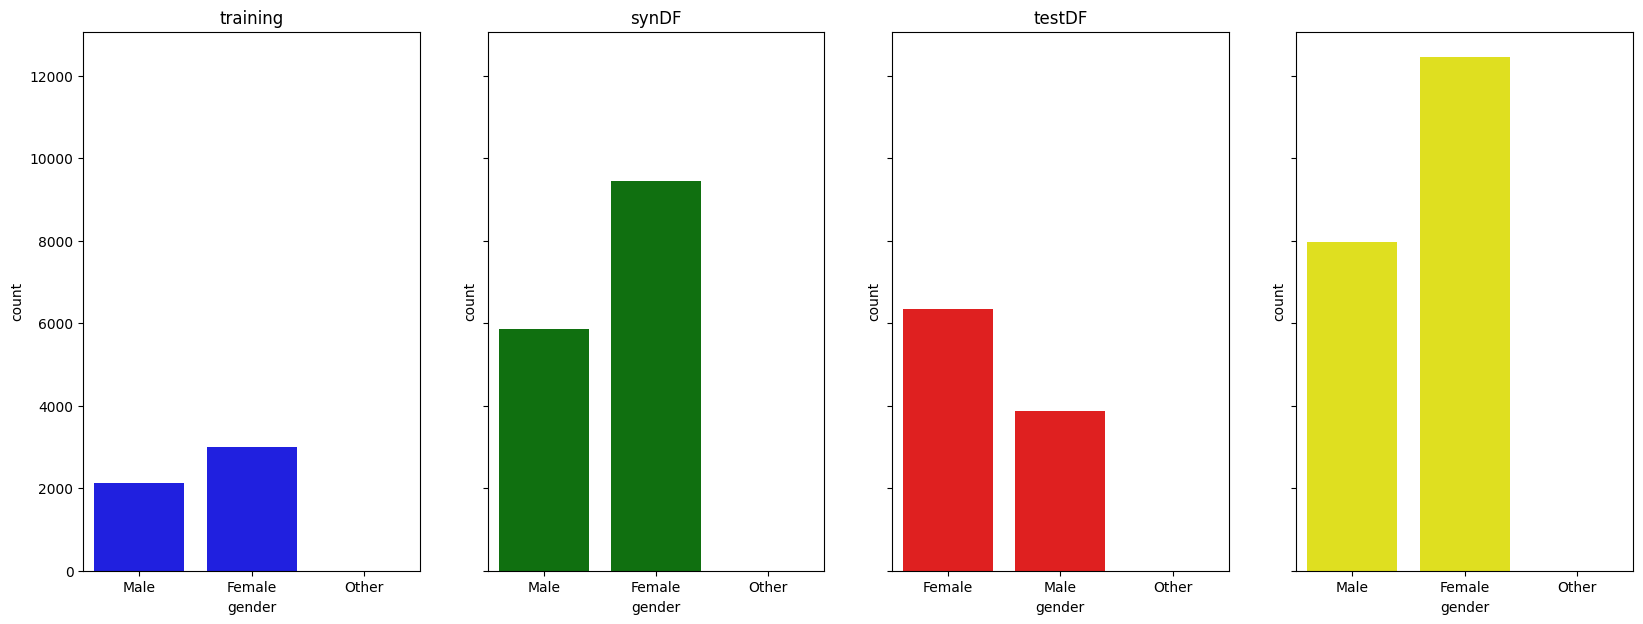

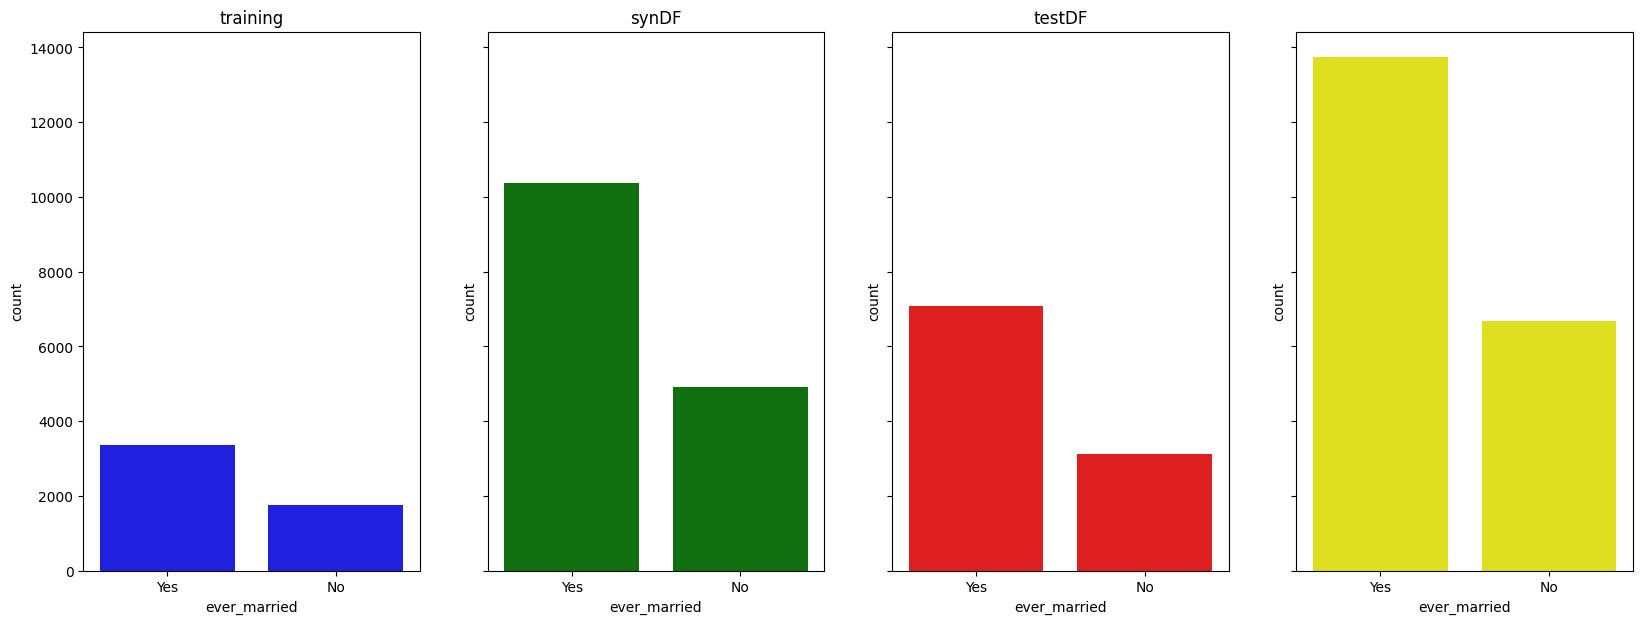

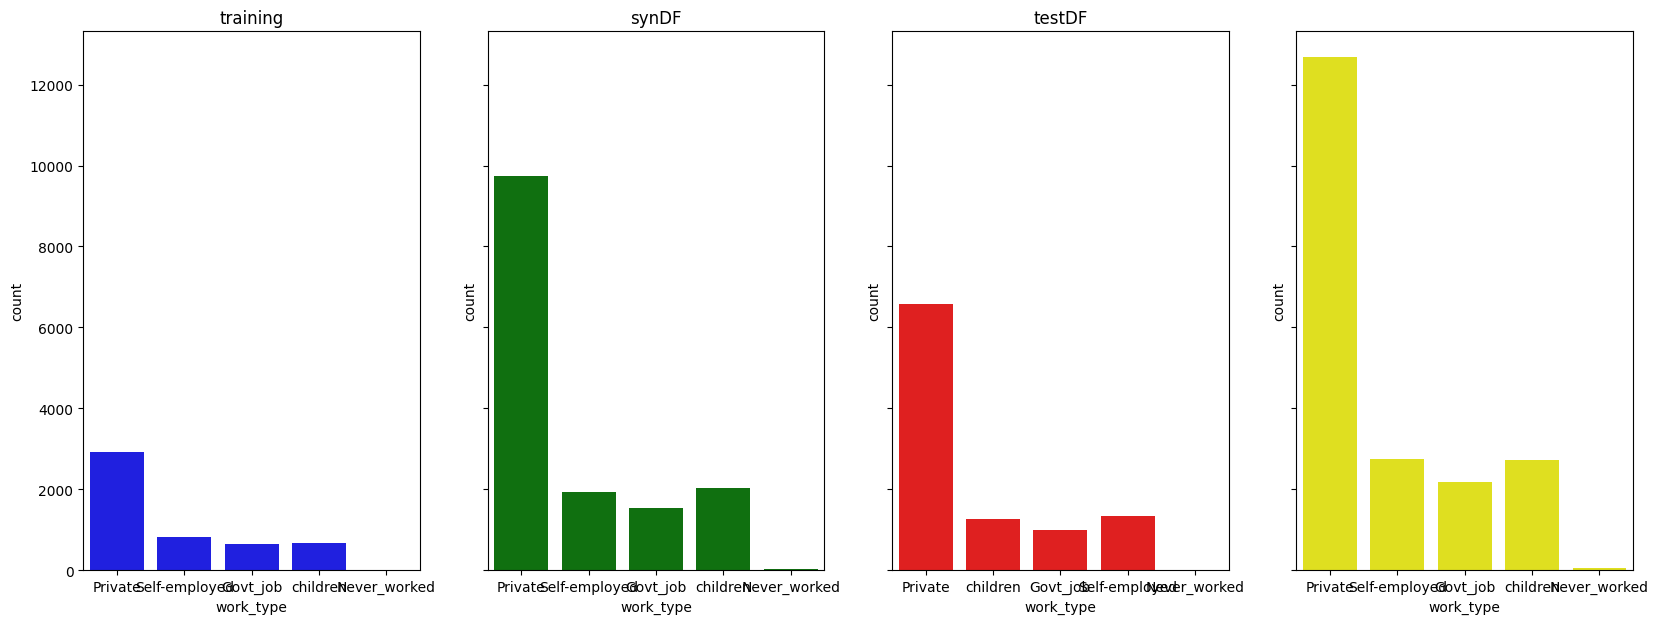

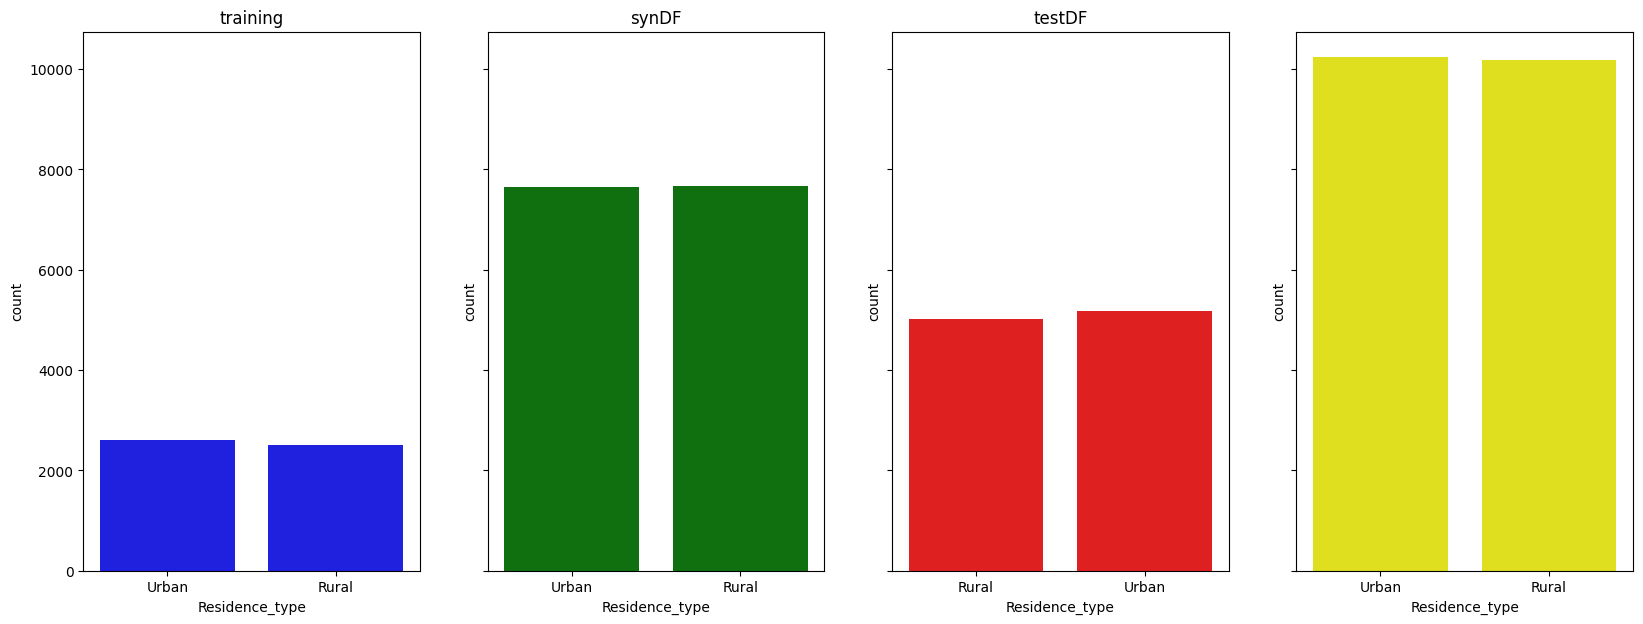

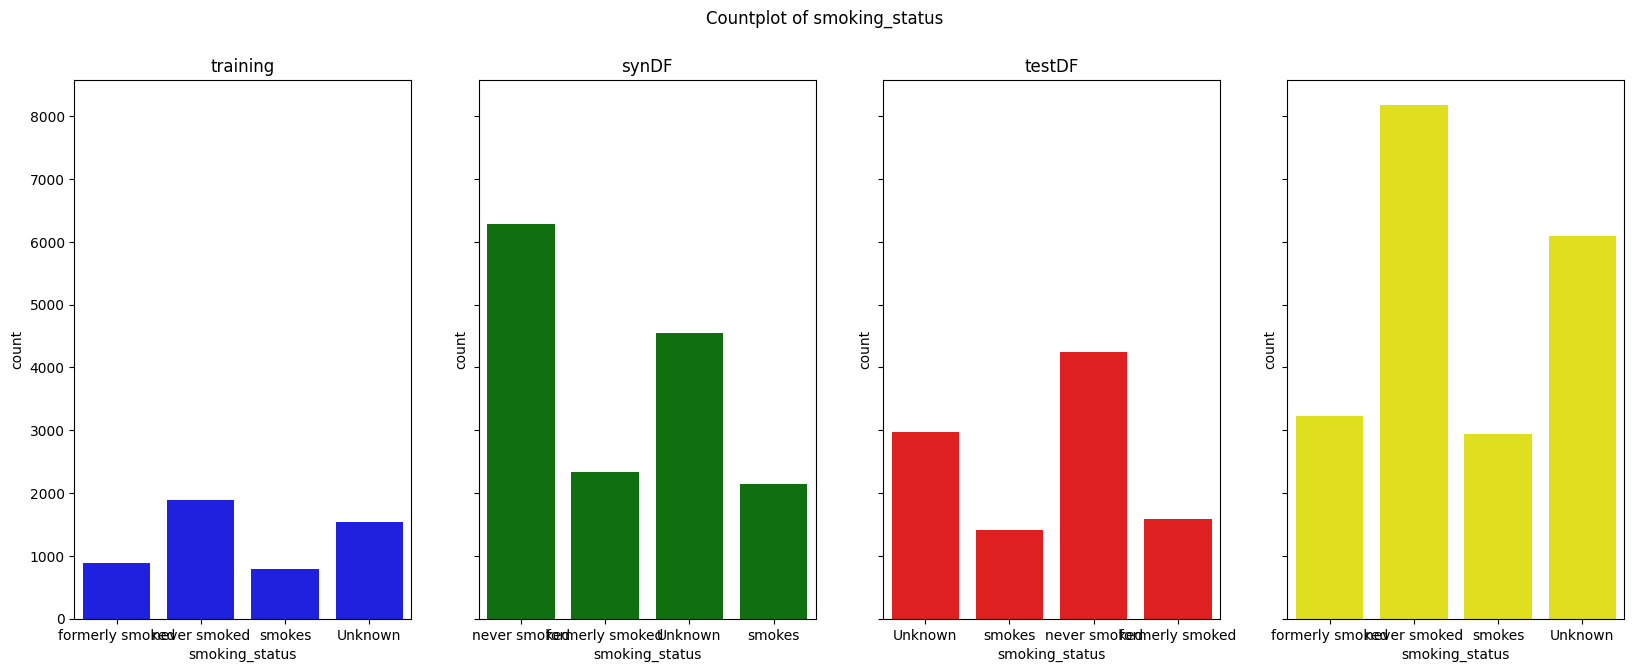

In [9]:
# List of categorical features to check for imbalance
features = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

for feature in features:
    fig, axes = plt.subplots(1, 4, figsize=(20, 7), sharey=True)

    sns.countplot(ax=axes[0], x=realDF[feature], color='blue')
    axes[0].set_title('realDF')
    sns.countplot(ax=axes[1], x=synDF[feature], color='green')
    axes[1].set_title('synDF')
    sns.countplot(ax=axes[2], x=testDF[feature], color='red')
    axes[2].set_title('testDF')
    sns.countplot(ax=axes[3], x=training[feature], color='yellow')
    axes[0].set_title('training')

fig.suptitle('Countplot of ' + feature)
plt.show()


In [10]:
bmi_mean = training['bmi'].mean()
training['bmi'].fillna(bmi_mean,inplace = True)
training.isna().sum()
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20414 entries, 0 to 20413
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 20414 non-null  int64  
 1   gender             20414 non-null  object 
 2   age                20414 non-null  float64
 3   hypertension       20414 non-null  int64  
 4   heart_disease      20414 non-null  int64  
 5   ever_married       20414 non-null  object 
 6   work_type          20414 non-null  object 
 7   Residence_type     20414 non-null  object 
 8   avg_glucose_level  20414 non-null  float64
 9   bmi                20414 non-null  float64
 10  smoking_status     20414 non-null  object 
 11  stroke             20414 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 1.9+ MB


In [11]:
bmi_mean = testDF['bmi'].mean()
testDF['bmi'].fillna(bmi_mean,inplace = True)
testDF.isna().sum()
testDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10204 entries, 0 to 10203
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 10204 non-null  int64  
 1   gender             10204 non-null  object 
 2   age                10204 non-null  float64
 3   hypertension       10204 non-null  int64  
 4   heart_disease      10204 non-null  int64  
 5   ever_married       10204 non-null  object 
 6   work_type          10204 non-null  object 
 7   Residence_type     10204 non-null  object 
 8   avg_glucose_level  10204 non-null  float64
 9   bmi                10204 non-null  float64
 10  smoking_status     10204 non-null  object 
dtypes: float64(3), int64(3), object(5)
memory usage: 877.0+ KB


In [12]:
training

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.60000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.30228,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.50000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.40000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.00000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
20409,15299,Female,22.0,0,0,No,Govt_job,Urban,72.63,19.50000,never smoked,0
20410,15300,Female,46.0,1,0,Yes,Private,Urban,101.19,32.10000,never smoked,0
20411,15301,Female,75.0,0,0,Yes,Self-employed,Urban,87.69,26.20000,never smoked,0
20412,15302,Male,46.0,0,0,Yes,Private,Rural,101.13,22.50000,Unknown,0


In [13]:
testDF

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,15304,Female,57.0,0,0,Yes,Private,Rural,82.54,33.4,Unknown
1,15305,Male,70.0,1,0,Yes,Private,Urban,72.06,28.5,Unknown
2,15306,Female,5.0,0,0,No,children,Urban,103.72,19.5,Unknown
3,15307,Female,56.0,0,0,Yes,Govt_job,Urban,69.24,41.4,smokes
4,15308,Male,32.0,0,0,Yes,Private,Rural,111.15,30.1,smokes
...,...,...,...,...,...,...,...,...,...,...,...
10199,25503,Female,27.0,0,0,No,Private,Urban,75.77,17.6,never smoked
10200,25504,Male,49.0,0,0,Yes,Private,Urban,102.91,26.7,Unknown
10201,25505,Female,3.0,0,0,No,children,Rural,104.04,18.3,Unknown
10202,25506,Male,31.0,0,0,Yes,Private,Urban,82.41,28.7,never smoked


In [14]:
training = training.drop('id', axis=1)


# Define mapping dictionaries
def prepare_DF(data):
    gender_mapping = {'Male': 1, 'Female': 0, 'Other':0}
    residence_mapping = {'Urban': 1, 'Rural': 0}
    work_type_mapping = {
        'Private': 0,
        'Self-employed': 1,
        'Govt_job': 2,
        'children': 3,
        'Never_worked': 4
    }
    smoking_status_mapping = {
        'never smoked': 0,
        'formerly smoked': 1,
        'smokes': 2,
        'Unknown': np.nan
    }
    ever_married_mapping = {'Yes': 1, 'No': 0}

    # Apply mappings to respective columns

    data['gender'] = data['gender'].map(gender_mapping)
    data['Residence_type'] = data['Residence_type'].map(residence_mapping)
    data['work_type'] = data['work_type'].map(work_type_mapping)
    data['smoking_status'] = data['smoking_status'].map(smoking_status_mapping)
    data['ever_married'] = data['ever_married'].map(ever_married_mapping)

    # Hot-deck 'unknown' values in 'smoking_status' column
    known_values = data['smoking_status'].dropna().unique()
    unknown_indices = data['smoking_status'].isna()
    random_known_values = np.random.choice(known_values, size=unknown_indices.sum(), replace=True)
    data.loc[unknown_indices, 'smoking_status'] = random_known_values
    


In [15]:
prepare_DF(training)
prepare_DF(testDF)

                 id        gender           age  hypertension  heart_disease  \
count  20414.000000  20414.000000  20414.000000  20414.000000   20414.000000   
mean   14877.273636      0.390516     41.870510      0.061673       0.031008   
std    16825.306948      0.487878     21.756482      0.240567       0.173344   
min        0.000000      0.000000      0.080000      0.000000       0.000000   
25%     4766.250000      0.000000     25.000000      0.000000       0.000000   
50%     9511.500000      0.000000     43.000000      0.000000       0.000000   
75%    14279.750000      1.000000     58.000000      0.000000       0.000000   
max    72940.000000      1.000000     82.000000      1.000000       1.000000   

       ever_married     work_type  Residence_type  avg_glucose_level  \
count   20414.00000  20414.000000    20414.000000       20414.000000   
mean        0.67297      0.762663        0.501421          93.322256   
std         0.46914      1.110932        0.500010          32.4

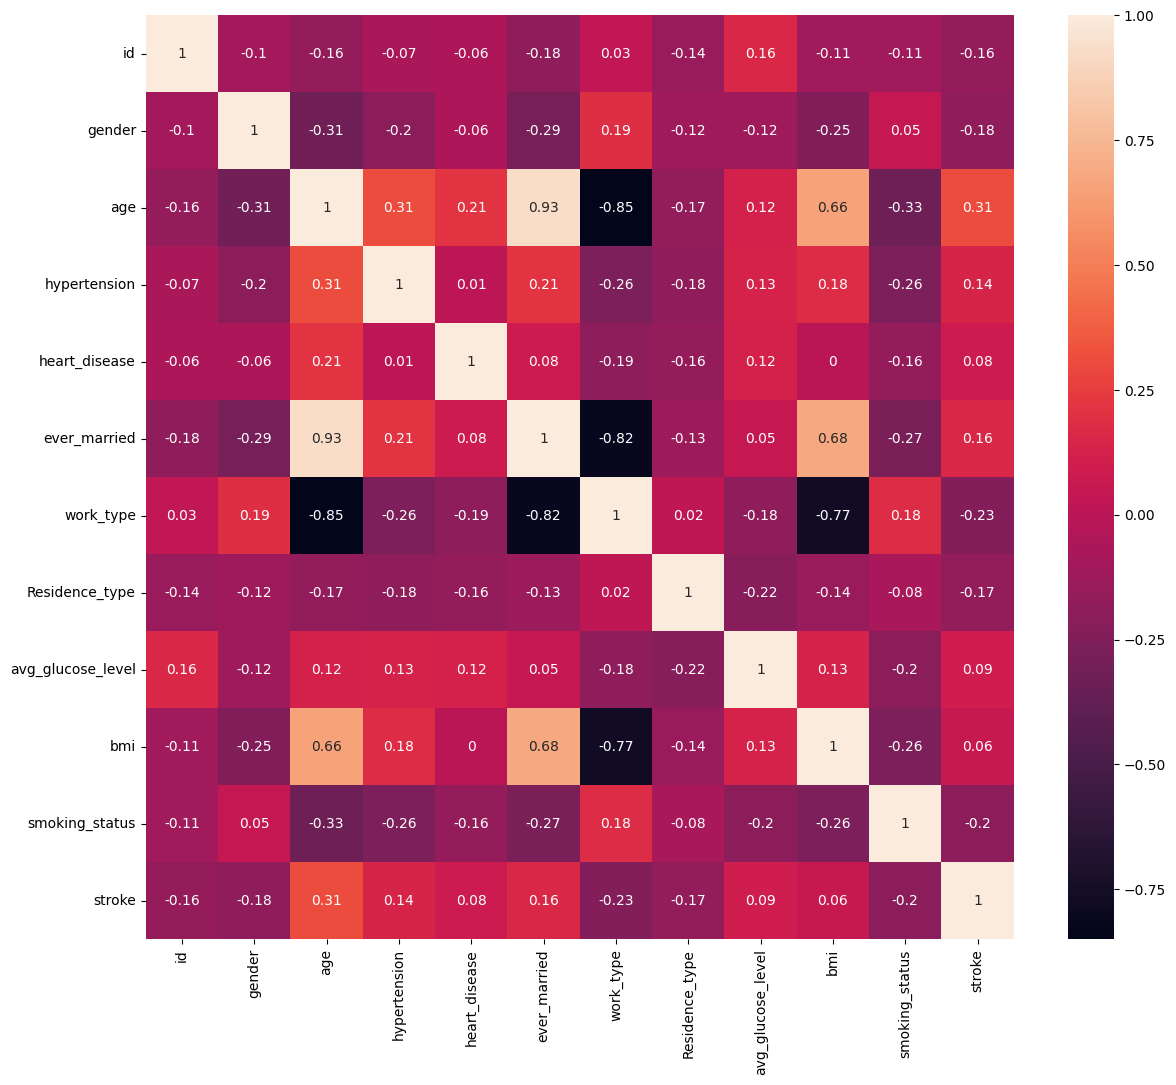

In [16]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

print(training.describe())

df_encoded = pd.get_dummies(training)

correlation_matrix = df_encoded.corr().round(2)

print(correlation_matrix)

plt.figure(figsize=(14, 12))
plot = sns.heatmap(correlation_matrix.corr().round(2), annot=True)

plt.show()

In [17]:
# get a list of models to evaluate
def get_models():
    models = dict()
    
    # define the pipeline
    scaler = StandardScaler()
    
    mod1 = RandomForestClassifier() 
    mod2 = CatBoostClassifier(verbose=False) 
    mod3 = XGBClassifier() 
    mod4 = LGBMClassifier() 
    mod5 = LogisticRegression()

    models['Random Forest'] = Pipeline(steps=[('s', scaler),('m', mod1)])
    models['Cat Boost'] = Pipeline(steps=[('s', scaler),('m', mod2)])
    models['XGBoost'] = Pipeline(steps=[('s', scaler),('m', mod3)])
    models['LightGBM'] = Pipeline(steps=[('s', scaler),('m', mod4)])
    models['Logistic Regression'] = Pipeline(steps=[('s', scaler), ('m', mod5)])

    return models

In [18]:
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=7)
    scores = cross_val_score(model, X, y, scoring= 'roc_auc' , cv=cv, n_jobs=-1)
    return scores

In [19]:
# encode categorical features
categorical_ix = training.select_dtypes(include=['object']).columns
encoder = OrdinalEncoder()
training[categorical_ix] = encoder.fit_transform(training[categorical_ix]).astype(int)


In [20]:
# define dataset
X = training.drop(['stroke'], axis = 1)
y = training['stroke']
y = y.values.ravel()

# get the models to evaluate
models = get_models()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    scores = scores
    results.append(scores)
    names.append(name)
    print( '>%s %.3f (%.3f)'  % (name, np.mean(scores), np.std(scores)))


>Random Forest 0.851 (0.015)
>Cat Boost 0.868 (0.013)
>XGBoost 0.859 (0.011)
>LightGBM 0.870 (0.011)
>Logistic Regression 0.872 (0.011)


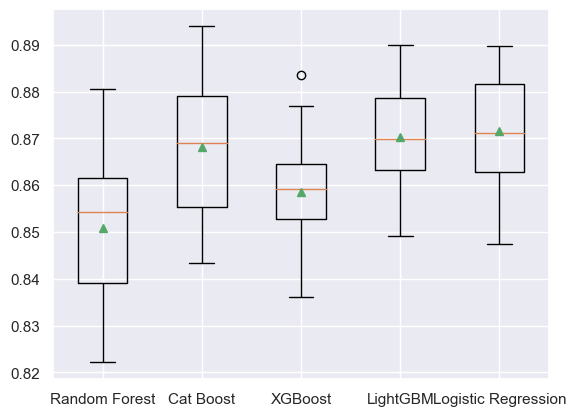

In [21]:
# plot model performance for comparison
sns.set(font_scale=1)
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

In [22]:
mod1 = LGBMClassifier(max_depth = 1,
                       scale_pos_weight = 1,
                       objective = 'binary',
                       n_estimators = 500, 
                       learning_rate = 0.3) 

mod2 = XGBClassifier(max_depth = 1,
                     scale_pos_weight = 1,
                     objective = 'binary:logistic',
                     n_estimators = 500, 
                     learning_rate = 0.3) 


mod3 = LogisticRegression()

estimators = [
    ("XGBoost", mod1),
    ("LightGBM", mod2),
]

mod = StackingClassifier(estimators=estimators, final_estimator = mod3)
calibrated = CalibratedClassifierCV(mod, method= 'sigmoid')

In [23]:
# encode categorical features
categorical_ix = training.select_dtypes(include=['object']).columns
encoder = OrdinalEncoder()
training[categorical_ix] = encoder.fit_transform(training[categorical_ix]).astype(int)
testDF[categorical_ix] = encoder.fit_transform(testDF[categorical_ix]).astype(int)

In [24]:
# define dataset
X = training.drop(['stroke'], axis = 1)
y = training['stroke']
oversample = ADASYN()
X, y = oversample.fit_resample(X, y)
y = y.values.ravel()

def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=7)
    scores = cross_val_score(model, X, y, scoring= 'roc_auc' , cv=cv, n_jobs=-1)
    return scores

calibrated

CalibratedClassifierCV(estimator=StackingClassifier(estimators=[('XGBoost',
                                                                 LGBMClassifier(learning_rate=0.3,
                                                                                max_depth=1,
                                                                                n_estimators=500,
                                                                                objective='binary',
                                                                                scale_pos_weight=1)),
                                                                ('LightGBM',
                                                                 XGBClassifier(base_score=None,
                                                                               booster=None,
                                                                               callbacks=None,
                                                                               colsample_bylevel=None,
                                                                               colsample_bynode=None,
                                                                               colsample_bytree=None,
                                                                               early_stopping_rounds=None,
                                                                               enable_ca...
                                                                               importance_type=None,
                                                                               interaction_constraints=None,
                                                                               learning_rate=0.3,
                                                                               max_bin=None,
                                                                               max_cat_threshold=None,
                                                                               max_cat_to_onehot=None,
                                                                               max_delta_step=None,
                                                                               max_depth=1,
                                                                               max_leaves=None,
                                                                               min_child_weight=None,
                                                                               missing=nan,
                                                                               monotone_constraints=None,
                                                                               n_estimators=500,
                                                                               n_jobs=None,
                                                                               num_parallel_tree=None,
                                                                               predictor=None,
                                                                               random_state=None, ...))],
                                                    final_estimator=LogisticRegression()))

In [25]:
scores = evaluate_model(calibrated, X, y)
print( '>%s %.3f (±%.3f)'  % ('AUC', np.mean(scores), np.std(scores)))

>AUC 0.972 (±0.001)


In [29]:
X = training.drop('stroke', axis = 1)
y = training['stroke']
y = y.values.ravel()
X_test = testDF.drop('id', axis = 1)

calibrated.fit(X, y)
y_pred = calibrated.predict(X_test)
y_score = calibrated.predict_proba(X_test)[:,1]

submission = pd.DataFrame(data={'id': testDF.id, 'stroke': y_score})
submission.to_csv('submission.csv', index=False)
submission.head()

,id,stroke
0,15304,0.032508
1,15305,0.111340
2,15306,0.024699
3,15307,0.034989
4,15308,0.025277
